# Biomedical Digital Image Processing

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from collections import defaultdict
import cv2
from utils import *

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = [4, 3]
plt.rcParams['font.size'] = 5

### Base Image

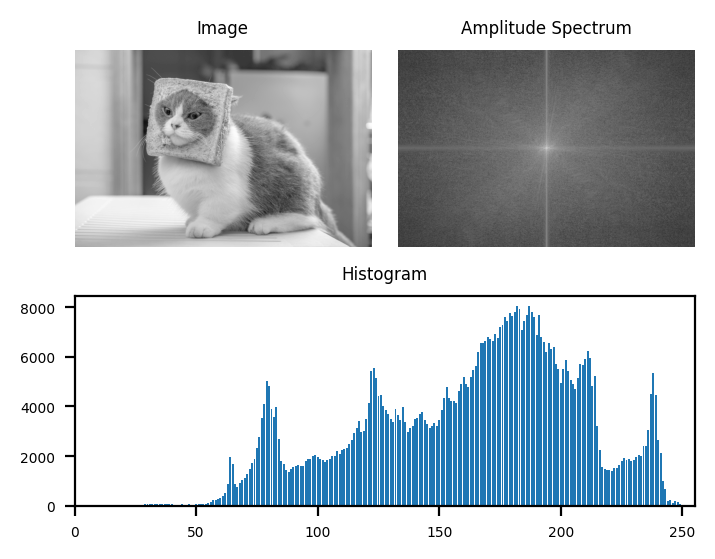

In [36]:
# Loac Image
img = np.asarray(Image.open('cat.png').convert('L'))

# Show Image
visualize(img)
plt.savefig('./img/03_base.png', dpi=150, bbox_inches='tight')

---
# 03. Enhancement in Spatial Domain

### Log Transformation
$ s=c\cdot\log(1+r) $  
Here, $s=255\log_{256}(1+r) = 255\cdot\frac{\log(1+r)}{\log256}$

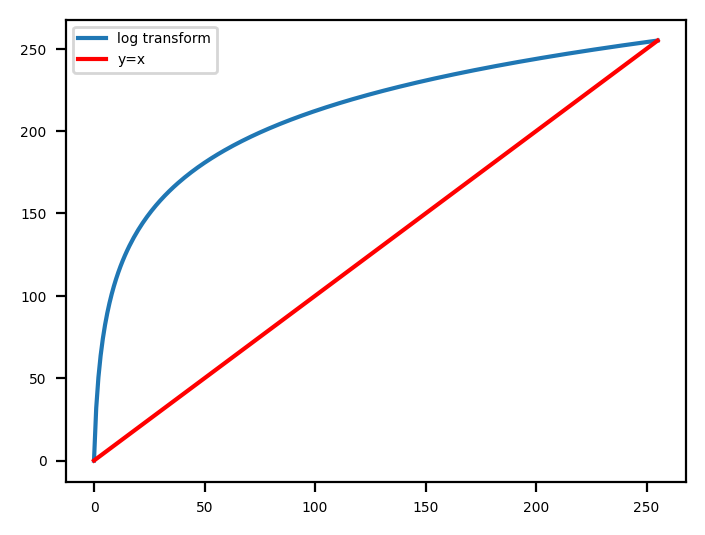

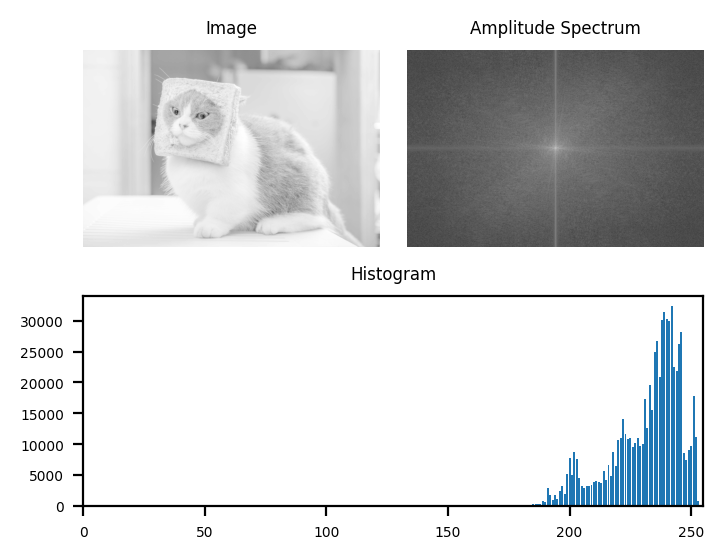

In [37]:
# Transform
transform = lambda r: 255 * np.log(1+r) / np.log(256)

# Apply Pixel-wise Log Transform
img_logtransform = np.zeros_like(img)
for h in range(img.shape[0]):
    for w in range(img.shape[1]):
        img_logtransform[h, w] = transform(img[h, w])

# Applied Function
x = np.arange(0, 256)
y = transform(x)
plt.plot(x, y, label='log transform')
plt.plot(x, x, color='red', label='y=x')
plt.legend()
plt.savefig('./img/03_func.png', dpi=150, bbox_inches='tight')
plt.show()

visualize(img_logtransform)
plt.savefig('./img/03_log.png', dpi=150, bbox_inches='tight')

### Histogram Equalization

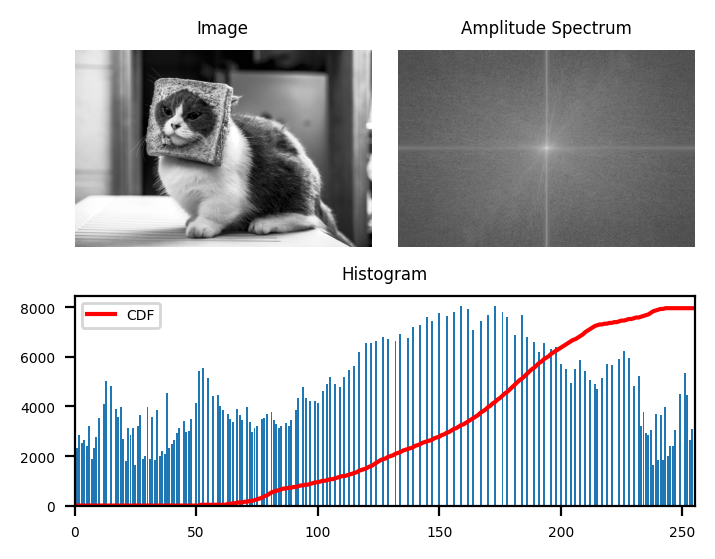

In [38]:
# Get Cumulative Probability Function
img_hist = histogram(img)
cdf = {}
for i in range(256):
    if i == 0:
        cdf[0] = img_hist[0]
        continue
    cdf[i] = img_hist[i] + cdf[i-1]

s = img.shape[0] * img.shape[1]
for i in range(256):
    cdf[i] = round(255 * cdf[i] / s)

# Apply Histogram Equalization
img_histogram_eq = np.zeros_like(img)
for h in range(img.shape[0]):
    for w in range(img.shape[1]):
        img_histogram_eq[h, w] = cdf[img[h, w]]

# Visualization
visualize(img_histogram_eq, cdf=False)
temp = {i : 8000/256*j for i,j in cdf.items()}
plt.plot(temp.keys(), temp.values(), color='red', label='CDF')
plt.legend()
plt.savefig('./img/03_hist_eq.png', bbox_inches='tight')

### Low Pass Filter  
This applies $N\times N$ Gaussian Filter.

$$\mathcal{N}(x,y; 0, \sigma^2) = \frac{1}{2\pi\sigma^2}e^{-\frac{x^2+y^2}{2\sigma^2}}$$  
where $\lfloor\frac{N}{2}\rfloor$ is the center.

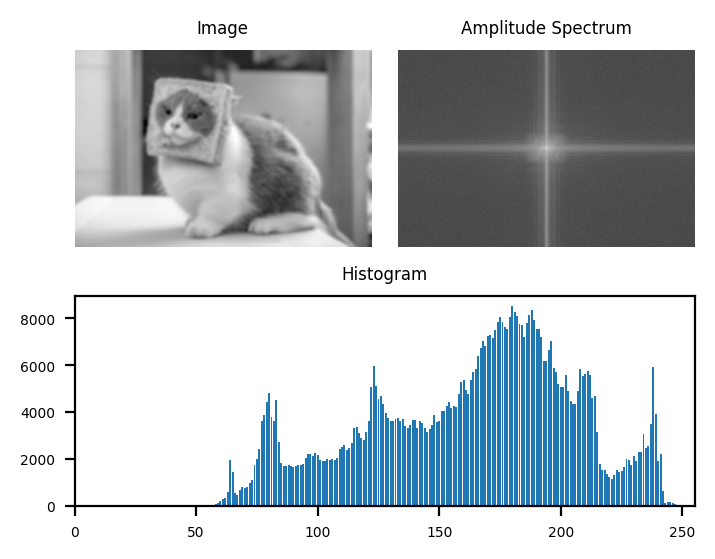

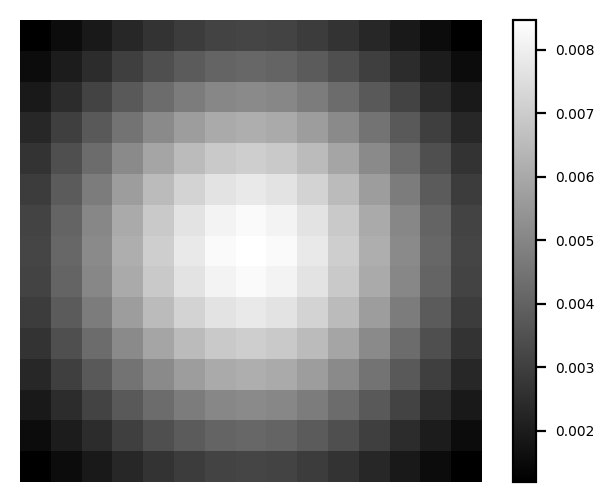

In [39]:
# Get Gaussian Filter
N = 15
sig = 5
LPF = cv2.getGaussianKernel(N, sig)
LPF = np.outer(LPF, LPF)

# Apply LPF
img_low = cv2.filter2D(img, -1, LPF)

visualize(img_low)
plt.savefig('./img/02_Low_freq.png', dpi=150, bbox_inches='tight')
plt.show()
visualizePixel(LPF)
plt.savefig('./img/03_LPF.png', dpi=150, bbox_inches='tight')

### High Pass Filter, Sharpening  
$$ \text{HPF}=[1+\alpha]e-\alpha H$$  
where e is identity kernel, alpha is hyperparameter, H is LPF.

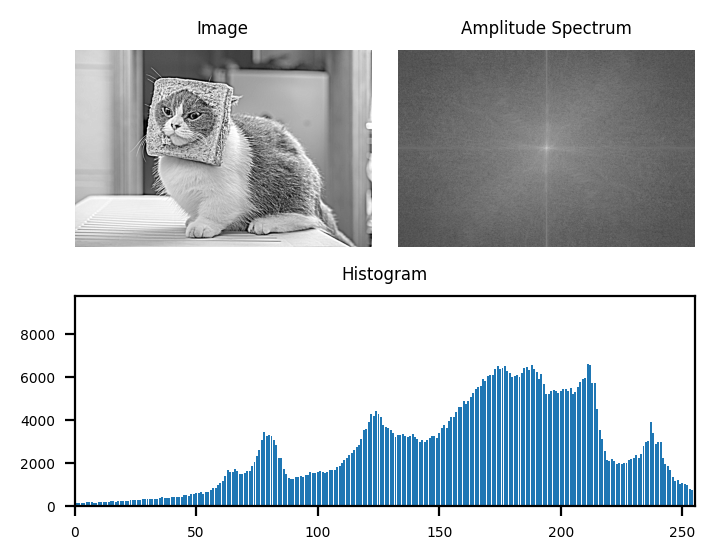

In [40]:
# Get HPF
alpha = 3
e = np.zeros((N, N))
e[int(N/2), int(N/2)] = 1
HPF = (1+alpha)*e - alpha*LPF

# Apply HPF
img_high = cv2.filter2D(img, -1, HPF)

visualize(img_high)
plt.savefig('./img/03_sharpening.png', dpi=150, bbox_inches='tight')